#Installing Libraries (if installed before just need to import it)

In [191]:
#!pip install numpy
#!pip install panda
#!pip install matplotlib
#!pip install seaborn

#Importing Libraries needed for regression

In [192]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

#Importing dataset 

In [193]:
url="https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)
label_data = data.copy()
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#Data Evaluation and prepration 

In [194]:
#Shape of Dataset
data.shape

(1338, 7)

In [195]:
#Last 5 entries of Dataset
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [196]:
#Information on dataset 
data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [197]:
#to find if any null values are present 
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [198]:
#Used to describe the dataset (Count , Mean , min , max )
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [199]:
data = data[(data["bmi"]<53)&(data["bmi"]>15)]
data = data[(data["charges"]<63000)]

data.shape

(1336, 7)

In [200]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['sex', 'smoker', 'region']


In [201]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#**Prediction of medical insurance using attribute 'AGE'**

In [202]:
X= label_data.drop(["charges","sex","bmi","children","smoker","region"],axis =1)
y= label_data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)

print(f"X_train shape{X_train.shape}")
print(f"X_test shape{X_test.shape}")
print(f"Y_train shape{y_train.shape}")
print(f"Y_test shape{y_test.shape}")

X_train shape(1070, 1)
X_test shape(268, 1)
Y_train shape(1070,)
Y_test shape(268,)


In [203]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,y_train)
Lin_pred = Lin_reg.predict(X_test)

Rand_reg=RandomForestRegressor()
Rand_reg.fit(X_train,y_train)
Rand_pred = Rand_reg.predict(X_test)

In [204]:
from sklearn.metrics import *
#Mean squared error
print('MSE for linear regression :', mean_squared_error(y_test, Lin_pred))
print('MSE for Random forest regression :', mean_squared_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Mean absolute error
print('MAE for linear regression :', mean_absolute_error(y_test, Lin_pred))
print('MAE for Random forest regression :', mean_absolute_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Root mean squared error
print('RMSE for linear regression :', np.sqrt(mean_squared_error(y_test, Lin_pred)))
print('RMSE for Random forest regression :', np.sqrt(mean_squared_error(y_test, Rand_pred)))


MSE for linear regression : 135983957.4805469
MSE for Random forest regression : 142182803.67696843
------------------------------------------------------------------------------------------
MAE for linear regression : 9173.258196746589
MAE for Random forest regression : 9163.903696554606
------------------------------------------------------------------------------------------
RMSE for linear regression : 11661.21595205864
RMSE for Random forest regression : 11924.04309271685


In [205]:
print(f"The R2 score for linear regression {r2_score(y_test,Lin_pred)}")
print(f"The R2 score is for Random Forest regression {r2_score(y_test,Rand_pred)}")

The R2 score for linear regression 0.12408973539501944
The R2 score is for Random Forest regression 0.08416125329499025


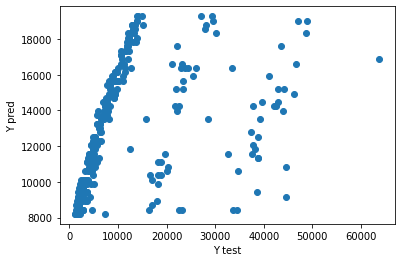

In [206]:
plt.scatter(y_test,Lin_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

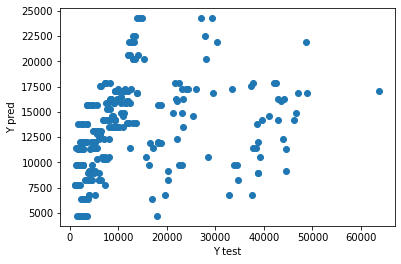

In [207]:
plt.scatter(y_test,Rand_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [208]:
a=input("What is the age of the patient admitted ? ")
data = {'age':a}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

What is the age of the patient admitted ? 30


,age
0,30


In [209]:
costpredLin = Lin_reg.predict(cust_df)
costpredRand = Rand_reg.predict(cust_df)

print("The medical insurance cost of the new customer under Linear regression is: ", costpredLin)
print("The medical insurance cost of the new customer under Random forest regression is: ", costpredRand)

The medical insurance cost of the new customer under Linear regression is:  [11094.82547785]
The medical insurance cost of the new customer under Random forest regression is:  [15733.23237644]


#**Prediction of medical insurance using attribute 'SEX'**

In [222]:
X= label_data.drop(["charges","age","bmi","children","smoker","region"],axis =1)
y= label_data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)

print(f"X_train shape{X_train.shape}")
print(f"X_test shape{X_test.shape}")
print(f"Y_train shape{y_train.shape}")
print(f"Y_test shape{y_test.shape}")

X_train shape(1070, 1)
X_test shape(268, 1)
Y_train shape(1070,)
Y_test shape(268,)


In [223]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,y_train)
Lin_pred = Lin_reg.predict(X_test)

Rand_reg=RandomForestRegressor()
Rand_reg.fit(X_train,y_train)
Rand_pred = Rand_reg.predict(X_test)

In [224]:
from sklearn.metrics import *
#Mean squared error
print('MSE for linear regression :', mean_squared_error(y_test, Lin_pred))
print('MSE for Random forest regression :', mean_squared_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Mean absolute error
print('MAE for linear regression :', mean_absolute_error(y_test, Lin_pred))
print('MAE for Random forest regression :', mean_absolute_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Root mean squared error
print('RMSE for linear regression :', np.sqrt(mean_squared_error(y_test, Lin_pred)))
print('RMSE for Random forest regression :', np.sqrt(mean_squared_error(y_test, Rand_pred)))


MSE for linear regression : 154843202.23394078
MSE for Random forest regression : 154823638.99839807
------------------------------------------------------------------------------------------
MAE for linear regression : 9542.194429668785
MAE for Random forest regression : 9524.700159012795
------------------------------------------------------------------------------------------
RMSE for linear regression : 12443.600854814526
RMSE for Random forest regression : 12442.81475384079


In [225]:
print(f"The R2 score for linear regression {r2_score(y_test,Lin_pred)}")
print(f"The R2 score for Random forest regression {r2_score(y_test,Rand_pred)}")

The R2 score for linear regression 0.00261212606335659
The R2 score for Random forest regression 0.002738138271989432


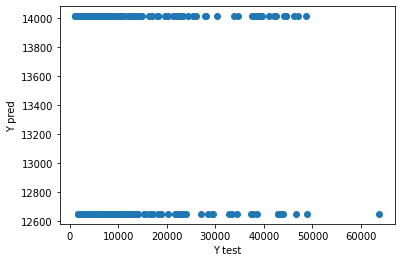

In [214]:
plt.scatter(y_test,Lin_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

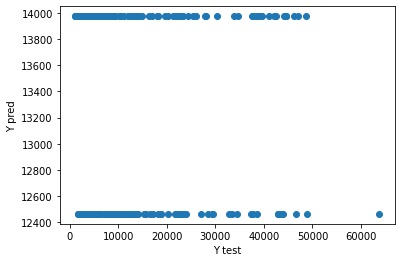

In [215]:
plt.scatter(y_test,Rand_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [216]:
print("sex is 0 for female and 1 for male ") 
a=input("What is the sex of the patient admitted ? ")
data = {'sex':a}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

sex is 0 for female and 1 for male 
What is the sex of the patient admitted ? 1


,sex
0,1


In [217]:
costpredLin = Lin_reg.predict(cust_df)
costpredRand = Rand_reg.predict(cust_df)

print("The medical insurance cost of the new customer under Linear regression is: ", costpredLin)
print("The medical insurance cost of the new customer under Random forest regression is: ", costpredRand)

The medical insurance cost of the new customer under Linear regression is:  [14012.12273617]
The medical insurance cost of the new customer under Random forest regression is:  [13974.38802711]


#**Prediction of medical insurance using attribute 'BMI'**

In [226]:
X= label_data.drop(["charges","age","sex","children","smoker","region"],axis =1)
y= label_data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)

print(f"X_train shape{X_train.shape}")
print(f"X_test shape{X_test.shape}")
print(f"Y_train shape{y_train.shape}")
print(f"Y_test shape{y_test.shape}")

X_train shape(1070, 1)
X_test shape(268, 1)
Y_train shape(1070,)
Y_test shape(268,)


In [227]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,y_train)
Lin_pred = Lin_reg.predict(X_test)

Rand_reg=RandomForestRegressor()
Rand_reg.fit(X_train,y_train)
Rand_pred = Rand_reg.predict(X_test)

In [228]:
from sklearn.metrics import *
#Mean squared error
print('MSE for linear regression :', mean_squared_error(y_test, Lin_pred))
print('MSE for Random forest regression :', mean_squared_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Mean absolute error
print('MAE for linear regression :', mean_absolute_error(y_test, Lin_pred))
print('MAE for Random forest regression :', mean_absolute_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Root mean squared error
print('RMSE for linear regression :', np.sqrt(mean_squared_error(y_test, Lin_pred)))
print('RMSE for Random forest regression :', np.sqrt(mean_squared_error(y_test, Rand_pred)))


MSE for linear regression : 149085057.03839505
MSE for Random forest regression : 212204410.13893858
------------------------------------------------------------------------------------------
MAE for linear regression : 9784.65259627133
MAE for Random forest regression : 10933.977568522287
------------------------------------------------------------------------------------------
RMSE for linear regression : 12210.039190698571
RMSE for Random forest regression : 14567.237560324833


In [229]:
print(f"The R2 score for Linear regression is  {r2_score(y_test,Lin_pred)}")
print(f"The R2 score for Random forest regression is {r2_score(y_test,Rand_pred)}")

The R2 score for Linear regression is  0.03970193117941878
The R2 score for Random forest regression is -0.36686727227902094


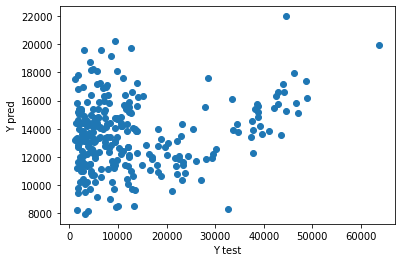

In [230]:
plt.scatter(y_test,Lin_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

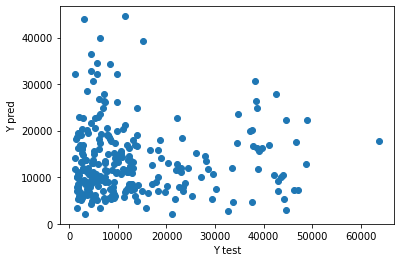

In [231]:
plt.scatter(y_test,Rand_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [232]:
a=input("Bmi of the patient admitted ?")
data = {'bmi':a}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

Bmi of the patient admitted ?23


,bmi
0,23


In [234]:
costpredLin = Lin_reg.predict(cust_df)
costpredRand = Rand_reg.predict(cust_df)

print("The medical insurance cost of the new customer under Linear regression is: ", costpredLin)
print("The medical insurance cost of the new customer under Random forest regression is: ", costpredRand)

The medical insurance cost of the new customer under Linear regression is:  [10379.11358811]
The medical insurance cost of the new customer under Random forest regression is:  [11926.0376244]


#**Prediction of medical insurance using attribute 'CHILDREN'**

In [235]:
X= label_data.drop(["charges","age","sex","bmi","smoker","region"],axis =1)
y= label_data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)

print(f"X_train shape{X_train.shape}")
print(f"X_test shape{X_test.shape}")
print(f"Y_train shape{y_train.shape}")
print(f"Y_test shape{y_test.shape}")

X_train shape(1070, 1)
X_test shape(268, 1)
Y_train shape(1070,)
Y_test shape(268,)


In [236]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,y_train)
Lin_pred = Lin_reg.predict(X_test)

Rand_reg=RandomForestRegressor()
Rand_reg.fit(X_train,y_train)
Rand_pred = Rand_reg.predict(X_test)

In [237]:
from sklearn.metrics import *
#Mean squared error
print('MSE for linear regression :', mean_squared_error(y_test, Lin_pred))
print('MSE for Random forest regression :', mean_squared_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Mean absolute error
print('MAE for linear regression :', mean_absolute_error(y_test, Lin_pred))
print('MAE for Random forest regression :', mean_absolute_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Root mean squared error
print('RMSE for linear regression :', np.sqrt(mean_squared_error(y_test, Lin_pred)))
print('RMSE for Random forest regression :', np.sqrt(mean_squared_error(y_test, Rand_pred)))


MSE for linear regression : 154985513.03144488
MSE for Random forest regression : 154271488.3156367
------------------------------------------------------------------------------------------
MAE for linear regression : 9570.371167068748
MAE for Random forest regression : 9574.402731496497
------------------------------------------------------------------------------------------
RMSE for linear regression : 12449.317773735429
RMSE for Random forest regression : 12420.607405261495


In [238]:
print(f"The R2 score for Linear regression is  {r2_score(y_test,Lin_pred)}")
print(f"The R2 score for Random forest regression is {r2_score(y_test,Rand_pred)}")

The R2 score for Linear regression is  0.0016954628730256882
The R2 score for Random forest regression is 0.00629469346864564


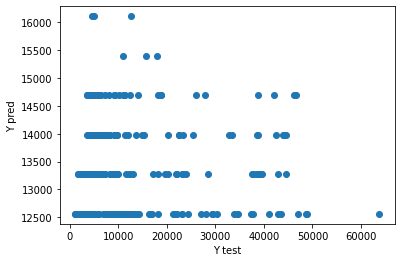

In [239]:
plt.scatter(y_test,Lin_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

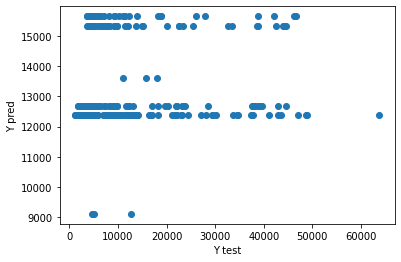

In [240]:
plt.scatter(y_test,Rand_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [241]:
a=input("number of children for the patient admitted ?")
data = {'children':a}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

number of children for the patient admitted ?2


,children
0,2


In [242]:
costpredLin = Lin_reg.predict(cust_df)
costpredRand = Rand_reg.predict(cust_df)

print("The medical insurance cost of the new customer under Linear regression is: ", costpredLin)
print("The medical insurance cost of the new customer under Random forest regression is: ", costpredRand)

The medical insurance cost of the new customer under Linear regression is:  [13980.27603078]
The medical insurance cost of the new customer under Random forest regression is:  [15314.55834884]


#**Prediction of medical insurance using attribute 'SMOKER'**

In [243]:
X= label_data.drop(["charges","age","sex","children","bmi","region"],axis =1)
y= label_data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)

print(f"X_train shape{X_train.shape}")
print(f"X_test shape{X_test.shape}")
print(f"Y_train shape{y_train.shape}")
print(f"Y_test shape{y_test.shape}")

X_train shape(1070, 1)
X_test shape(268, 1)
Y_train shape(1070,)
Y_test shape(268,)


In [244]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,y_train)
Lin_pred = Lin_reg.predict(X_test)

Rand_reg=RandomForestRegressor()
Rand_reg.fit(X_train,y_train)
Rand_pred = Rand_reg.predict(X_test)

In [245]:
from sklearn.metrics import *
#Mean squared error
print('MSE for linear regression :', mean_squared_error(y_test, Lin_pred))
print('MSE for Random forest regression :', mean_squared_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Mean absolute error
print('MAE for linear regression :', mean_absolute_error(y_test, Lin_pred))
print('MAE for Random forest regression :', mean_absolute_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Root mean squared error
print('RMSE for linear regression :', np.sqrt(mean_squared_error(y_test, Lin_pred)))
print('RMSE for Random forest regression :', np.sqrt(mean_squared_error(y_test, Rand_pred)))


MSE for linear regression : 52745964.72752626
MSE for Random forest regression : 52804721.70219318
------------------------------------------------------------------------------------------
MAE for linear regression : 5625.810656140094
MAE for Random forest regression : 5628.285474624678
------------------------------------------------------------------------------------------
RMSE for linear regression : 7262.641718240427
RMSE for Random forest regression : 7266.685744009656


In [246]:
print(f"The R2 score for Linear regression is  {r2_score(y_test,Lin_pred)}")
print(f"The R2 score for Random forest regression is {r2_score(y_test,Rand_pred)}")

The R2 score for Linear regression is  0.6602486589056528
The R2 score for Random forest regression is 0.6598701889877197


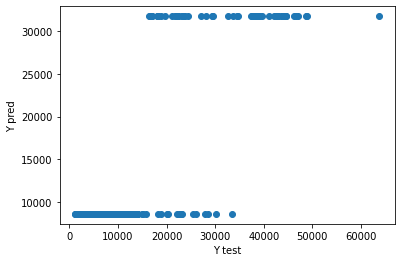

In [247]:
plt.scatter(y_test,Lin_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

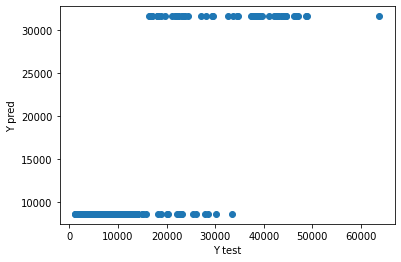

In [248]:
plt.scatter(y_test,Rand_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [249]:
#smoker =1 , non smoker = 0
a=input("Is the patient smooker(1) or non smoker (0) ?")
data = {'smoker':a}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

Is the patient smooker(1) or non smoker (0) ?1


,smoker
0,1


In [250]:
costpredLin = Lin_reg.predict(cust_df)
costpredRand = Rand_reg.predict(cust_df)

print("The medical insurance cost of the new customer under Linear regression is: ", costpredLin)
print("The medical insurance cost of the new customer under Random forest regression is: ", costpredRand)

The medical insurance cost of the new customer under Linear regression is:  [31767.00841868]
The medical insurance cost of the new customer under Random forest regression is:  [31663.72118929]


#**Prediction of medical insurance using attribute 'REGION'**

In [251]:
X= label_data.drop(["charges","age","sex","children","smoker","bmi"],axis =1)
y= label_data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)

print(f"X_train shape{X_train.shape}")
print(f"X_test shape{X_test.shape}")
print(f"Y_train shape{y_train.shape}")
print(f"Y_test shape{y_test.shape}")

X_train shape(1070, 1)
X_test shape(268, 1)
Y_train shape(1070,)
Y_test shape(268,)


In [252]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,y_train)
Lin_pred = Lin_reg.predict(X_test)

Rand_reg=RandomForestRegressor()
Rand_reg.fit(X_train,y_train)
Rand_pred = Rand_reg.predict(X_test)

In [253]:
from sklearn.metrics import *
#Mean squared error
print('MSE for linear regression :', mean_squared_error(y_test, Lin_pred))
print('MSE for Random forest regression :', mean_squared_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Mean absolute error
print('MAE for linear regression :', mean_absolute_error(y_test, Lin_pred))
print('MAE for Random forest regression :', mean_absolute_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Root mean squared error
print('RMSE for linear regression :', np.sqrt(mean_squared_error(y_test, Lin_pred)))
print('RMSE for Random forest regression :', np.sqrt(mean_squared_error(y_test, Rand_pred)))


MSE for linear regression : 155390388.27671438
MSE for Random forest regression : 153582727.75968096
------------------------------------------------------------------------------------------
MAE for linear regression : 9593.328497839419
MAE for Random forest regression : 9542.72849809427
------------------------------------------------------------------------------------------
RMSE for linear regression : 12465.568108863486
RMSE for Random forest regression : 12392.849864324226


In [254]:
print(f"The R2 score for Linear regression is  {r2_score(y_test,Lin_pred)}")
print(f"The R2 score for Random forest regression is {r2_score(y_test,Rand_pred)}")

The R2 score for Linear regression is  -0.0009124505146014261
The R2 score for Random forest regression is 0.010731190626061982


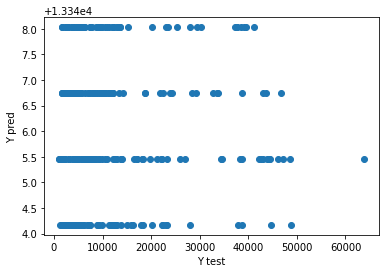

In [255]:
plt.scatter(y_test,Lin_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

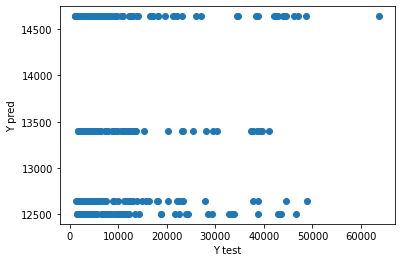

In [256]:
plt.scatter(y_test,Rand_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [257]:
a=input("what is the region of the patient  ?")
data = {'region':a}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

what is the region of the patient  ?4


,region
0,4


In [258]:
costpredLin = Lin_reg.predict(cust_df)
costpredRand = Rand_reg.predict(cust_df)

print("The medical insurance cost of the new customer under Linear regression is: ", costpredLin)
print("The medical insurance cost of the new customer under Random forest regression is: ", costpredRand)

The medical insurance cost of the new customer under Linear regression is:  [13342.88322272]
The medical insurance cost of the new customer under Random forest regression is:  [12650.29681851]


#**Prediction of medical insurance using attribute 'AGE with SEX'**

In [259]:
X= label_data.drop(["charges","children","smoker","bmi","region"],axis =1)
y= label_data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)

print(f"X_train shape{X_train.shape}")
print(f"X_test shape{X_test.shape}")
print(f"Y_train shape{y_train.shape}")
print(f"Y_test shape{y_test.shape}")

X_train shape(1070, 2)
X_test shape(268, 2)
Y_train shape(1070,)
Y_test shape(268,)


In [260]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,y_train)
Lin_pred = Lin_reg.predict(X_test)

Rand_reg=RandomForestRegressor()
Rand_reg.fit(X_train,y_train)
Rand_pred = Rand_reg.predict(X_test)

In [261]:
from sklearn.metrics import *
#Mean squared error
print('MSE for linear regression :', mean_squared_error(y_test, Lin_pred))
print('MSE for Random forest regression :', mean_squared_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Mean absolute error
print('MAE for linear regression :', mean_absolute_error(y_test, Lin_pred))
print('MAE for Random forest regression :', mean_absolute_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Root mean squared error
print('RMSE for linear regression :', np.sqrt(mean_squared_error(y_test, Lin_pred)))
print('RMSE for Random forest regression :', np.sqrt(mean_squared_error(y_test, Rand_pred)))


MSE for linear regression : 135083722.3222642
MSE for Random forest regression : 146660662.96057853
------------------------------------------------------------------------------------------
MAE for linear regression : 9090.817005259492
MAE for Random forest regression : 9073.569537562562
------------------------------------------------------------------------------------------
RMSE for linear regression : 11622.552315316296
RMSE for Random forest regression : 12110.353543996085


In [262]:
print(f"The R2 score for Linear regression is  {r2_score(y_test,Lin_pred)}")
print(f"The R2 score for Random forest regression is {r2_score(y_test,Rand_pred)}")

The R2 score for Linear regression is  0.12988839893083326
The R2 score for Random forest regression is 0.05531812368882416


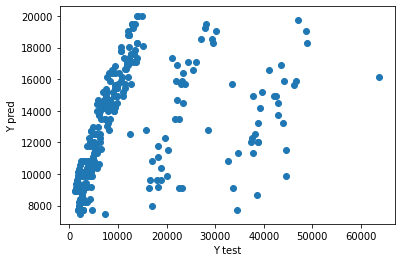

In [263]:
plt.scatter(y_test,Lin_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

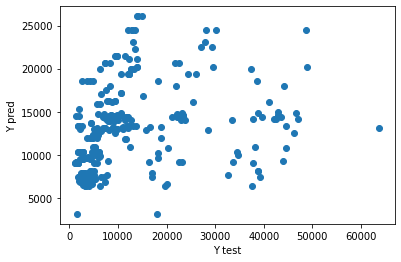

In [264]:
plt.scatter(y_test,Rand_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [265]:
a=input("what is the age of the patient admitted  ?")
b=input("what is the sex of the patient admitted ?")
data = {'age':a,'sex':b}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

what is the age of the patient admitted  ?3
what is the sex of the patient admitted ?1


,age,sex
0,3,1


In [266]:
costpredLin = Lin_reg.predict(cust_df)
costpredRand = Rand_reg.predict(cust_df)

print("The medical insurance cost of the new customer under Linear regression is: ", costpredLin)
print("The medical insurance cost of the new customer under Random forest regression is: ", costpredRand)

The medical insurance cost of the new customer under Linear regression is:  [5277.1968712]
The medical insurance cost of the new customer under Random forest regression is:  [9012.68667456]


#**Prediction of medical insurance using attribute 'AGE ,SEX ,BMI'**

In [267]:
X= label_data.drop(["charges","children","smoker","region"],axis =1)
y= label_data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)

print(f"X_train shape{X_train.shape}")
print(f"X_test shape{X_test.shape}")
print(f"Y_train shape{y_train.shape}")
print(f"Y_test shape{y_test.shape}")

X_train shape(1070, 3)
X_test shape(268, 3)
Y_train shape(1070,)
Y_test shape(268,)


In [268]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,y_train)
Lin_pred = Lin_reg.predict(X_test)

Rand_reg=RandomForestRegressor()
Rand_reg.fit(X_train,y_train)
Rand_pred = Rand_reg.predict(X_test)

In [269]:
from sklearn.metrics import *
#Mean squared error
print('MSE for linear regression :', mean_squared_error(y_test, Lin_pred))
print('MSE for Random forest regression :', mean_squared_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Mean absolute error
print('MAE for linear regression :', mean_absolute_error(y_test, Lin_pred))
print('MAE for Random forest regression :', mean_absolute_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Root mean squared error
print('RMSE for linear regression :', np.sqrt(mean_squared_error(y_test, Lin_pred)))
print('RMSE for Random forest regression :', np.sqrt(mean_squared_error(y_test, Rand_pred)))


MSE for linear regression : 131043916.53369787
MSE for Random forest regression : 155793616.5496622
------------------------------------------------------------------------------------------
MAE for linear regression : 9147.865122298897
MAE for Random forest regression : 9268.160133132185
------------------------------------------------------------------------------------------
RMSE for linear regression : 11447.441484178806
RMSE for Random forest regression : 12481.731312188314


In [270]:
print(f"The R2 score for Linear regression is  {r2_score(y_test,Lin_pred)}")
print(f"The R2 score for Random forest regression is {r2_score(y_test,Rand_pred)}")

The R2 score for Linear regression is  0.15590990487003253
The R2 score for Random forest regression is -0.0035097552981782076


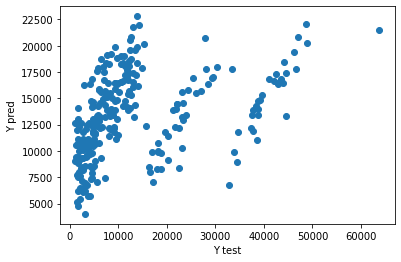

In [271]:
plt.scatter(y_test,Lin_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

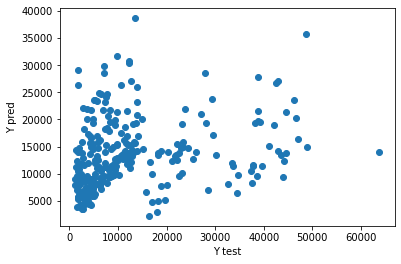

In [272]:
plt.scatter(y_test,Rand_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [273]:
a=input("what is the age of the patient admitted  ?")
b=input("what is the sex of the patient admitted ?")
c=input("what is the bmi of the patient admitted ?")
data = {'age':a,'sex':b,'bmi':c}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

what is the age of the patient admitted  ?23
what is the sex of the patient admitted ?1
what is the bmi of the patient admitted ?23.4


,age,sex,bmi
0,23,1,23.4


In [274]:
costpredLin = Lin_reg.predict(cust_df)
costpredRand = Rand_reg.predict(cust_df)

print("The medical insurance cost of the new customer under Linear regression is: ", costpredLin)
print("The medical insurance cost of the new customer under Random forest regression is: ", costpredRand)

The medical insurance cost of the new customer under Linear regression is:  [7984.32946186]
The medical insurance cost of the new customer under Random forest regression is:  [5919.3668066]


#**Prediction of medical insurance using attribute 'SMOKER, REGION, CHILDREN'**

In [275]:
X= label_data.drop(["charges","age","sex","bmi"],axis =1)
y= label_data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)

print(f"X_train shape{X_train.shape}")
print(f"X_test shape{X_test.shape}")
print(f"Y_train shape{y_train.shape}")
print(f"Y_test shape{y_test.shape}")

X_train shape(1070, 3)
X_test shape(268, 3)
Y_train shape(1070,)
Y_test shape(268,)


In [276]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,y_train)
Lin_pred = Lin_reg.predict(X_test)

Rand_reg=RandomForestRegressor()
Rand_reg.fit(X_train,y_train)
Rand_pred = Rand_reg.predict(X_test)

In [277]:
from sklearn.metrics import *
#Mean squared error
print('MSE for linear regression :', mean_squared_error(y_test, Lin_pred))
print('MSE for Random forest regression :', mean_squared_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Mean absolute error
print('MAE for linear regression :', mean_absolute_error(y_test, Lin_pred))
print('MAE for Random forest regression :', mean_absolute_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Root mean squared error
print('RMSE for linear regression :', np.sqrt(mean_squared_error(y_test, Lin_pred)))
print('RMSE for Random forest regression :', np.sqrt(mean_squared_error(y_test, Rand_pred)))


MSE for linear regression : 52240352.854180194
MSE for Random forest regression : 53599888.34792412
------------------------------------------------------------------------------------------
MAE for linear regression : 5612.526993369098
MAE for Random forest regression : 5577.683914248442
------------------------------------------------------------------------------------------
RMSE for linear regression : 7227.748809565825
RMSE for Random forest regression : 7321.19446182958


In [278]:
print(f"The R2 score for Linear regression is  {r2_score(y_test,Lin_pred)}")
print(f"The R2 score for Random forest regression is {r2_score(y_test,Rand_pred)}")

The R2 score for Linear regression is  0.6635054447646268
The R2 score for Random forest regression is 0.6547483007887615


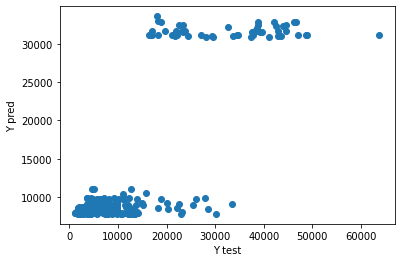

In [279]:
plt.scatter(y_test,Lin_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

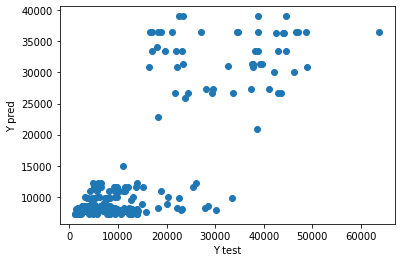

In [280]:
plt.scatter(y_test,Rand_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [281]:
a=input("what is the number of children of the patient admitted  ?")
b=input("is the patient a smoker  ?")
c=input("what is the region of the patient admitted ?")
data = {'children':a,'smoker':b,'region':c}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

what is the number of children of the patient admitted  ?3
is the patient a smoker  ?1
what is the region of the patient admitted ?2


,children,smoker,region
0,3,1,2


In [282]:
costpredLin = Lin_reg.predict(cust_df)
costpredRand = Rand_reg.predict(cust_df)

print("The medical insurance cost of the new customer under Linear regression is: ", costpredLin)
print("The medical insurance cost of the new customer under Random forest regression is: ", costpredRand)

The medical insurance cost of the new customer under Linear regression is:  [32935.24395842]
The medical insurance cost of the new customer under Random forest regression is:  [30076.36756705]


#**Prediction of medical insurance using attribute 'AGE, SEX, BMI, CHILDREN, SMOKER, REGION'**

In [283]:
X= label_data.drop(["charges"],axis =1)
y= label_data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)

print(f"X_train shape{X_train.shape}")
print(f"X_test shape{X_test.shape}")
print(f"Y_train shape{y_train.shape}")
print(f"Y_test shape{y_test.shape}")

X_train shape(1070, 6)
X_test shape(268, 6)
Y_train shape(1070,)
Y_test shape(268,)


In [284]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,y_train)
Lin_pred = Lin_reg.predict(X_test)

Rand_reg=RandomForestRegressor()
Rand_reg.fit(X_train,y_train)
Rand_pred = Rand_reg.predict(X_test)

In [285]:
from sklearn.metrics import *
#Mean squared error
print('MSE for linear regression :', mean_squared_error(y_test, Lin_pred))
print('MSE for Random forest regression :', mean_squared_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Mean absolute error
print('MAE for linear regression :', mean_absolute_error(y_test, Lin_pred))
print('MAE for Random forest regression :', mean_absolute_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Root mean squared error
print('RMSE for linear regression :', np.sqrt(mean_squared_error(y_test, Lin_pred)))
print('RMSE for Random forest regression :', np.sqrt(mean_squared_error(y_test, Rand_pred)))


MSE for linear regression : 33635210.431178406
MSE for Random forest regression : 21217407.543699294
------------------------------------------------------------------------------------------
MAE for linear regression : 4186.508898366435
MAE for Random forest regression : 2485.8412790550824
------------------------------------------------------------------------------------------
RMSE for linear regression : 5799.587091438356
RMSE for Random forest regression : 4606.23572385297


In [286]:
print(f"The R2 score for Linear regression is  {r2_score(y_test,Lin_pred)}")
print(f"The R2 score for Random forest regression is {r2_score(y_test,Rand_pred)}")

The R2 score for Linear regression is  0.7833463107364539
The R2 score for Random forest regression is 0.863332812192262


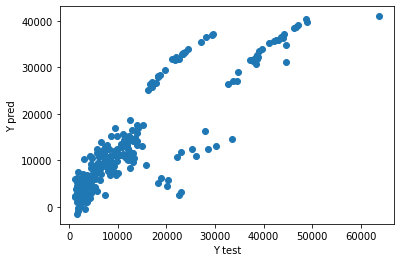

In [287]:
plt.scatter(y_test,Lin_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

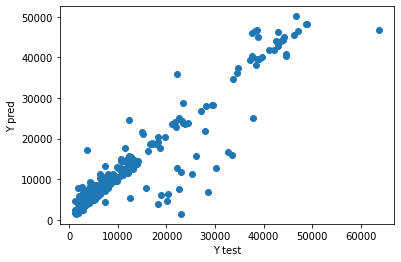

In [288]:
plt.scatter(y_test,Rand_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [290]:
a=input("what is the age of the patient admitted  ?")
b=input("what is the sex of the patient admitted ?")
c=input("what is the bmi of the patient admitted ?")
d=input("what is the number of children of the patient admitted  ?")
e=input("is the patient a smoker  ?")
f=input("what is the region of the patient admitted ?")
data = {'age':a,'sex':b,'bmi':c,'children':d,'smoker':e,'region':f}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

what is the age of the patient admitted  ?23
what is the sex of the patient admitted ?1
what is the bmi of the patient admitted ?12.3
what is the number of children of the patient admitted  ?2
is the patient a smoker  ?0
what is the region of the patient admitted ?2


,age,sex,bmi,children,smoker,region
0,23,1,12.3,2,0,2


In [291]:
costpredLin = Lin_reg.predict(cust_df)
costpredRand = Rand_reg.predict(cust_df)

print("The medical insurance cost of the new customer under Linear regression is: ", costpredLin)
print("The medical insurance cost of the new customer under Random forest regression is: ", costpredRand)

The medical insurance cost of the new customer under Linear regression is:  [-1615.37724102]
The medical insurance cost of the new customer under Random forest regression is:  [7291.6349966]
